# Математическая оптимизация и моделирование в PuLP: задача о назначениях

Приветствую! Я, Ложкинс Алексей, консультант и разработчик оптимизационных решений и математических моделей для бизнеса. Это первая в цикле работ обучающая статья, часть личного образовательного проекта "Make optimization simple". Цель проекта - продемонстрировать доступность технологий и показать на примерах, что моделировать можно без глубокого математического фундамента.

Из статьи вы узнаете об основных компонентах математической оптимизационной задачи на примере классической [задачи о назначениях](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BE_%D0%BD%D0%B0%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D1%8F%D1%85), в частности, распределение машин такси на заказы. Далее, я покажу, как реализовать программный прототип математической модели посредством Python и библиотеки [PuLP](https://pypi.org/project/PuLP/), а также продемонстрирую, как получить оптимальное решение задачи всего в одной строке кода без реализации специальных алгоритмов.

Материал статьи предназначен 
- для базового погружения в математическое моделирование и оптимизацию; 
- для демонстрации доступности технологий и возможностей моделировать, решать оптимизационные задачи без порога входа и специальной подготовки (мат./тех. образования).

## Математическая оптимизация

Математическая оптимизация - это мощный метод, используемый для поиска наилучшего решения задачи, отвечающего определенным критериям и удовлетворяющего набору ограничений. Она включает в себя четыре основных компонента:

1. Целевая функция - это математическое выражение, объект оптимизации. В зависимости от целей оптимизации выделяют два критерия: задача максимизации и задача минимизации целевой функции;

2. Ограничения - это условия, которые должны быть выполнены для того, чтобы решение было осуществимым. Они ограничивают возможные значения переменных и обычно выражаются в виде неравенств или равенств;

3. Решающие переменные - это неизвестные величины, которые мы хотим определить в результате решения оптимизационной задачи. Они используются для формулирования целевой функции и ограничений. Моделируют различные варианты выбора или действий, которые могут быть предприняты для достижения желаемого результата; 

4. Метод оптимизации - это алгоритмы, используемые для нахождения оптимального решения задачи. Мы сконцентрируем наше внимание на задачах смешанного линейного программирования (MILP), для которых существуют стандартные методы их решения. Кроме того, есть упакованные программные пакеты с этими методами, что повышает доступность мат.моделирования. 

Комбинация этих четырех компонентов - это то, что составляет задачу математической оптимизации. Тщательно сформулировав целевую функцию, переменные для принятия решения и ограничения, а также выбрав подходящий метод оптимизации, мы можем найти наилучшее решение для широкого спектра реальных проблем.

## Постановка задачи

Рассмотрим типичную питерскую ситуацию в пятницу вечером. Иван, Михаил и Александр запланировали пойти в бар. Одновременно заказывают такси от своего дома до бара, используя один и тот же агрегатор такси одинакового класса (например, комфорт). Рядом оказываются свободными ровно три машины с разной удаленностью от потенциальных пассажиров. Кроме этого, действуют следующие вполне реалистичные условия: пассажир может ехать только на одной машине, одна машина может взять не более одого заказа (пассажира).

*Задача:* назначить клиентам машины таким образом, чтобы все клиенты добрались до бара на такси, каждая машина перевезла не более одного пассажира и общие затраты на перевозку пассажиров были минимальны. 

## Задача о назначениях

Чтобы решить поставленную выше задачу, мы будем использовать линейное программирование. Оно представляет собой математический метод, используемый для оптимизации линейной целевой функции с учетом линейных ограничений. Линейное программирование имеет множество реальных применений, включая планирование производства, оптимизацию транспортировки и распределение ресурсов.

Построение программного прототипа линейной модели будем реализовывать посредством программного пакета PuLP, который предоставляет среду для инициализации самой математической модели и позволяет подключать сторонние пакеты (коммерческие или open source) для решения оптимизационных задач. Чтобы использовать PuLP для решения задачи с назначениями, нам сначала нужно будет установить библиотеку. Вы можете установить PuLP с помощью pip:

In [ ]:
%pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 26.4 MB/s eta 0:00:00


### Индексы и входные данные

Введем следующие обозначения:

$C$ - список клиентов: Иван, Александр и Михаил;

$T$ - список такси: желтое, зеленое, синее;

$c \in C$ - индекс и множество клиентов, клиент $c$ содержится во множестве $C$;

$t \in T$ - индекс и множество такси, машина $t$ содержится во множестве $T$.

Запишем эти множества в виде списков Python:

In [ ]:
# Инициализируем множества клиентов и множество такси. Используем англоязычные названия
C = ["Ivan", "Aleksander", "Mikhail"]  # имена клиентов
T = ["yellow", "green", "blue"]  # цвета машин

Целевая функция рассматриваемой задачи - минимизация затрат. Разберемся в структуре затрат. 

Общие затраты = постоянные затраты + переменные затраты. 

Под постоянными затратами будем понимать затраты на перевозку пассажира от его местоположения до бара. Они не зависят от того, какая из трех машин будет выполнять заказ (уровень сервиса одинаковый). В свою очередь, переменные затраты - это затраты на подачу машины клиенту. В зависимости от клиента эти затраты могут отличаться: разное расстояние и разное прогнозное время в пути до клиента. Постоянные затраты не влияют на целевуюу функцию, т.к. они не зависят от назначения, поэтому будем рассматривать только переменные затраты. Ниже представлена матрица переменных затрат.  

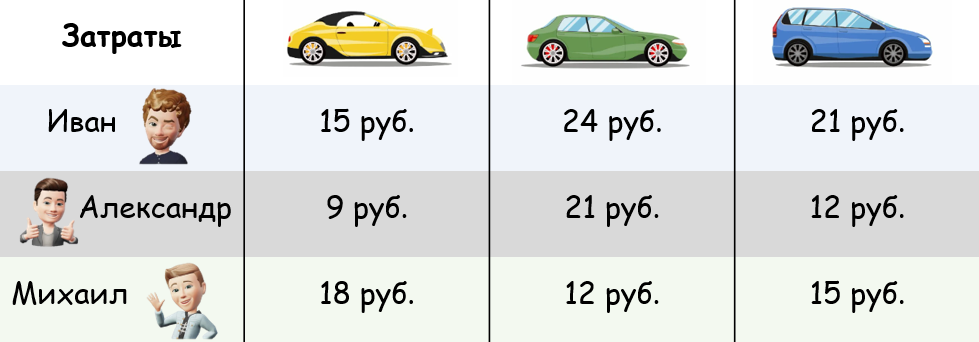

Для каждой комбинации клиента $c$ (строка) и машины $t$ (столбец) сопоставлены переменные затраты $e_{ct}$ в рублях. Воспользуемся словарем в Python для инициализации матрицы затрат, где по ключу ($c$, $t$) получим размер переменных затрат назначения.

In [ ]:
# Матрица переменных затрат
E = {
    ("Ivan", "yellow"): 15,
    ("Ivan", "green"): 24,
    ("Ivan", "blue"): 21,
    ("Aleksander", "yellow"): 9,
    ("Aleksander", "green"): 21,
    ("Aleksander", "blue"): 12,
    ("Mikhail", "yellow"): 18,
    ("Mikhail", "green"): 12,
    ("Mikhail", "blue"): 15,
}

### Инициализация модели

Импортируем библиотеку PuLP:

In [ ]:
import pulp

Прежде чем создавать переменные и ограничения, необходимо инициализировать класс модели. В дальнейшем ограничения и целевая функция будут определяться в привязке к модели. В качестве аргументов передаем название модели "TaxiAssignmentProblem" и класс оптимизационной задачи, в нашем случае - минимизация затрат: ```pulp.LpMinimize```. Модель может содержать только одну оптимизационную задачу. 

In [ ]:
# Инициализация модели
model = pulp.LpProblem("TaxiAssignmentProblem", pulp.LpMinimize)

### Инициализация переменных

Модель инициализирована, теперь можем начать запись нашей модели. Сначала определим набор решающих переменных.  Нам нужно выяснить, какую машину назначить какому клиенту. Определим для каждой возможной связки клиент-машина переменную, которая может принимать значение 1, если **выбрана** связка назначений, 0 - в противном случае. Таким образом, у нас есть 9 переменных для принятия решения.

*Например:* если переменная для связки Aleksander-green равна 1, следовательно, Алекандр поедет на зеленой машине. Если значение переменной равно 0, то Александр не поедет на зеленой машине. 

Добавление переменных в модель pulp возможно через метод ```LpVariable```, где в качестве аргументов передаем название переменной, нижнюю и верхнюю границы принимаемых значений (0 и 1 в нашем случае), тип переменной (в нашем случае - бинарная). 

**Комментарий:** для переменных, которые могут принимать значения 0 или 1, в pulp выделен отдельный тип - бинарные переменные. 

Переменные запишем в словарь, аналогичный словарю `E`. Назовем переменные $x_{ct}$, где $c \in C$  - клиент, а $t \in T$ - машина.

In [ ]:
# Инициализация переменных
X = {}  # Словарь для хранения ссылок на переменные

for (client, car) in E:
  var_name = "x_" + client + "_" + car  # Название переменной
  X[client, car] = pulp.LpVariable(var_name, cat=pulp.LpBinary)

  # Эквивалентный способ задания переменных через целочисленный тип
  # X[client, car] = pulp.LpVariable(var_name, lowBound=0, upBound=1, cat="Integer")
  
# Задание переменных без цикла
# X = pulp.LpVariable.dicts("x", E.keys(), 0, 1, pulp.LpBinary)

X

{('Ivan', 'yellow'): x_Ivan_yellow,
 ('Ivan', 'green'): x_Ivan_green,
 ('Ivan', 'blue'): x_Ivan_blue,
 ('Aleksander', 'yellow'): x_Aleksander_yellow,
 ('Aleksander', 'green'): x_Aleksander_green,
 ('Aleksander', 'blue'): x_Aleksander_blue,
 ('Mikhail', 'yellow'): x_Mikhail_yellow,
 ('Mikhail', 'green'): x_Mikhail_green,
 ('Mikhail', 'blue'): x_Mikhail_blue}

### Целевая функция

Целевая функция состоит в том, чтобы минимизировать переменные затраты. Для каждой переменной $x_{ct}$ мы ставим в соответствие размер затрат $e_{ct}$, на который возрастут общие затраты, если $x_{ct} = 1$. Например, если желтая машина будет назначена Ивану $x_{\text{Ivan,yellow}} = 1$, то затраты вырастут на $e_{\text{Ivan,yellow}} = 15$ рублей. Это условие можно записать как произведение затрат на переменную: $e_{ct} x_{ct}$. 

Суммируем все возможные произведения $e_{ct} x_{ct}$, получим функцию общих затрат. В принятых нами обозначениях она будет иметь следующий вид: 

\begin{equation}
\min \quad 15x_{\text{Ivan,yellow}} + 24x_{\text{Ivan,green}} + 21x_{\text{Ivan,blue}} + 
\end{equation}

\begin{equation}
9x_{\text{Aleksander,yellow}} + 21x_{\text{Aleksander,green}} + 12x_{\text{Aleksander,blue}} + 
\end{equation}

\begin{equation}18x_{\text{Mikhail,yellow}} + 12x_{\text{Mikhail,green}} + 15x_{\text{Mikhail,blue}}.
\end{equation}

В более локаничной форме с помощью символа суммы $\sum$ целевую функцию можно записать как 

$$\min \sum_{c \in C}\sum_{t \in T} e_{ct}x_{ct}$$

Метод `LpProblem.setObjective()` добавляет целевую функцию в модель. В качестве аргументов передается сама целевая функция и "направленность" оптимизации (минимизация/максимизация). Для нашей задачи определим целевую функцию следующим образом:

In [ ]:
# Построение целевой функции

# 1. Список произведений затрат на соответствующую переменную
lst_mult = [E[key] * var for key, var in X.items()]

# 2. Суммируем произведения
obj_expression = pulp.lpSum(lst_mult)  # Встроенный в pulp метод
# obj_expression = sum(lst_mult)  # Python сумма

# 3. Добавляем в модель
model.setObjective(obj_expression)

# Альтернативный способ инициализации целевой функции
# model += obj_expression

obj_expression

12*x_Aleksander_blue + 21*x_Aleksander_green + 9*x_Aleksander_yellow + 21*x_Ivan_blue + 24*x_Ivan_green + 15*x_Ivan_yellow + 15*x_Mikhail_blue + 12*x_Mikhail_green + 18*x_Mikhail_yellow + 0

### Ограничения

В нашей задаче два основных ограничения:
1. Все клиенты должны попасть в бар;
2. Одна машина не может перевозить более одного пассажира.

Оба этих ограничения можно записать в математическом виде и передать в модель. Для этого воспользуемся ранее введенными переменными. 


#### Ограничение 1: Все клиенты должны попасть в бар

Рассмотрим клиента Ивана. В бар он должен попасть на одной из трех машин: желтой, зеленой или синей. С каждым вариантом назначения машины Ивану связана бинарная переменная: $x_{\text{Ivan,yellow}}$, $x_{\text{Ivan,green}}$ и $x_{\text{Ivan,blue}}$. Условие можно переформулировать как: ровно одна машина должна быть назначена Ивану.

\begin{equation}
x_{\text{Ivan,yellow}} + x_{\text{Ivan,green}} + x_{\text{Ivan,blue}} = 1
\end{equation}

В случае Александра и Михаила строим аналогичные ограничения, но с учетом соответствующих им переменных:

\begin{equation}
x_{\text{Aleksander,yellow}} + x_{\text{Aleksander,green}} + x_{\text{Aleksander,blue}} = 1
\end{equation}

\begin{equation}
x_{\text{Mikhail,yellow}} + x_{\text{Mikhail,green}} + x_{\text{Mikhail,blue}} = 1
\end{equation}

Введенные ограничения можно записать в более локаничной форме с использованием символа суммы $\sum$ и символа повторения для каждого элемента множества $\forall$ («Для любого...»).

\begin{equation}
\sum_{t} x_{ct} = 1, \quad \forall c \in C.
\end{equation}

Добавление ограничений в PuLp незамысловатое, используется сочетание символов `+=`: 

```
model += expression, expression_name
```
Ограничению можно привязать название или оставить поле пустым. Само выражение для нашего ограничения состоит из операции сложения переменных, тип ограничения `==`, а значение правой части ограничения `1`. 


In [ ]:
# Ограничение: Все клиенты должны попасть в бар (Client Satisfaction Constraint)

for c in C:  # Создаем ограничение для каждого клиента
  # Название ограничения
  constr_name = f"{c}_sat_constr"  

  # Список возможных машин для клиента
  lst_vars = [X[c, t] for t in T]  

  # Добавление ограничений в модель 
  model += pulp.lpSum(lst_vars) == 1, constr_name 

# Выведем ограничения модели
dict(model.constraints)

{'Ivan_sat_constr': 1*x_Ivan_blue + 1*x_Ivan_green + 1*x_Ivan_yellow + -1 = 0,
 'Aleksander_sat_constr': 1*x_Aleksander_blue + 1*x_Aleksander_green + 1*x_Aleksander_yellow + -1 = 0,
 'Mikhail_sat_constr': 1*x_Mikhail_blue + 1*x_Mikhail_green + 1*x_Mikhail_yellow + -1 = 0}

Заметим, что PuLP добавил коэффициент при переменных равных 1, а также перенес правую часть выражения влево с противоположным знаком. Эти операции вполне законны и не меняют смысла исходного ограничения. 

#### Ограничение 2: Одна машина не может перевозить более одного пассажира.

Рассмотрим желтую машину. Она может взять Ивана, Александра, Михаила или никого. С каждым вариантом назначения желтой машины клиенту у нас связана бинарная переменная: $x_{\text{Ivan,yellow}}$, $x_{\text{Aleksander,yellow}}$ и $x_{\text{Mikhail,yellow}}$. Ограничение запишется в следующем виде: 

\begin{equation}
x_{\text{Ivan,yellow}} + x_{\text{Aleksander,yellow}} + x_{\text{Mikhail,yellow}} \le 1
\end{equation}

Заметим, что данное ограничение позволяет всем переменным присвоить значений 0, что будет означать отсутствие назначений на желтую машину. 

Для остальных машин имеем аналогичные ограничения: 

\begin{equation}
x_{\text{Ivan,green}} + x_{\text{Aleksander,green}} + x_{\text{Mikhail,green}} \le 1
\end{equation}

\begin{equation}
x_{\text{Ivan,blue}} + x_{\text{Aleksander,blue}} + x_{\text{Mikhail,blue}} \le 1
\end{equation}

Эти ограничения можно записать в более короткой форме с учетом ранее введенных обозначений: 

\begin{equation}
\sum_{c \in C} x_{ct} \le 1, \quad t \in T.
\end{equation}

Процесс добавления ограничений "назначение машины не более чем на одного пассажира" не отличается от добавления в модель PuLP предыдущего ограничения:

In [ ]:
# Ограничение: Одна машина не может перевозить более одного пассажира (Taxi Passengers Limitation Constraint)

for t in T:  # Создаем ограничение для каждой машины
  # Название ограничения
  constr_name = f"{t}_tpl_constr"  

  # Список возможных клиентов для машины t
  lst_vars = [X[c, t] for c in C]  

  # Добавление ограничений в модель 
  model += pulp.lpSum(lst_vars) <= 1, constr_name 

# Выведем ограничения модели
dict(model.constraints)

{'Ivan_sat_constr': 1*x_Ivan_blue + 1*x_Ivan_green + 1*x_Ivan_yellow + -1 = 0,
 'Aleksander_sat_constr': 1*x_Aleksander_blue + 1*x_Aleksander_green + 1*x_Aleksander_yellow + -1 = 0,
 'Mikhail_sat_constr': 1*x_Mikhail_blue + 1*x_Mikhail_green + 1*x_Mikhail_yellow + -1 = 0,
 'yellow_tpl_constr': 1*x_Aleksander_yellow + 1*x_Ivan_yellow + 1*x_Mikhail_yellow + -1 <= 0,
 'green_tpl_constr': 1*x_Aleksander_green + 1*x_Ivan_green + 1*x_Mikhail_green + -1 <= 0,
 'blue_tpl_constr': 1*x_Aleksander_blue + 1*x_Ivan_blue + 1*x_Mikhail_blue + -1 <= 0}

### Поиск оптимального решения

Прежде чем переходить к решению оптимизационной задачи, посмотрим на полную математическую модель нашей задачи. Существует достаточно распространненный формат записи задач Линейного программирования в формат .lp, удобный для чтения пользоватем. В PuLP для сохранения модели в формате .lp есть метод `LpProblem.writeLP()`, где в качестве аргументов передается название файла:



In [ ]:
# Запись модели в файл
model.writeLP("TaxiAssignmentProblem.lp")

[x_Aleksander_blue,
 x_Aleksander_green,
 x_Aleksander_yellow,
 x_Ivan_blue,
 x_Ivan_green,
 x_Ivan_yellow,
 x_Mikhail_blue,
 x_Mikhail_green,
 x_Mikhail_yellow]

Файл можно открыть обычным блокнотом. Здесь можно увидеть целевую функцию, ограничения с привязкой к их названию и типы переменных. 

```
\* TaxiAssignmentProblem *\
Minimize
OBJ: 12 x_Aleksander_blue + 21 x_Aleksander_green + 9 x_Aleksander_yellow
 + 21 x_Ivan_blue + 24 x_Ivan_green + 15 x_Ivan_yellow + 15 x_Mikhail_blue
 + 12 x_Mikhail_green + 18 x_Mikhail_yellow
Subject To
Aleksander_sat_constr: x_Aleksander_blue + x_Aleksander_green
 + x_Aleksander_yellow = 1
Ivan_sat_constr: x_Ivan_blue + x_Ivan_green + x_Ivan_yellow = 1
Mikhail_sat_constr: x_Mikhail_blue + x_Mikhail_green + x_Mikhail_yellow = 1
blue_tpl_constr: x_Aleksander_blue + x_Ivan_blue + x_Mikhail_blue <= 1
green_tpl_constr: x_Aleksander_green + x_Ivan_green + x_Mikhail_green <= 1
yellow_tpl_constr: x_Aleksander_yellow + x_Ivan_yellow + x_Mikhail_yellow <= 1
Binaries
x_Aleksander_blue
x_Aleksander_green
x_Aleksander_yellow
x_Ivan_blue
x_Ivan_green
x_Ivan_yellow
x_Mikhail_blue
x_Mikhail_green
x_Mikhail_yellow
End
```



Поиск оптимального решения в PuLP запускается с помощью метода `LpProblem.solve()`:

In [ ]:
# Поиск оптимального решения задачи
model.solve()

# Проверяем статус модели
pulp.LpStatus[model.status]

'Optimal'

Теперь давайте извлечем оптимальное значение целевой функции, используя метод PuLP `value(LpProblem.objective)` и оптимальные значения переменных  `LpVariable.varValue`. 

In [ ]:
# Значение целевой функции после решения задачи
obj_value = pulp.value(model.objective)
obj_value = int(obj_value)  # Преобразование в целочисленное значение

print(f"Минимальные переменные затраты для выполнения всех заказов = {obj_value} руб.")

# Извлечение значений переменных 
for (client, taxi), var in X.items():
  var_value =  var.varValue  # Извлечение значения переменной
  var_value = int(var_value)  # Преобразование в целочисленное значение

  if var_value > 0:  # Выводим оптимальные назначения машин клиентам
    print(f"- Клиенту {client} назначена машина {taxi}, затраты на подачу = {E[client, taxi]} руб.")

Минимальные переменные затраты для выполнения всех заказов = 39 руб.
- Клиену Ivan назначена машина yellow, затраты на подачу 15 руб.
- Клиену Aleksander назначена машина blue, затраты на подачу 12 руб.
- Клиену Mikhail назначена машина green, затраты на подачу 12 руб.


Минимальные переменные затраты для выполнения всех заказов = 39 руб.
- Клиенту Ivan назначена машина yellow, затраты на подачу = 15 руб.
- Клиенту Aleksander назначена машина blue, затраты на подачу = 12 руб.
- Клиенту Mikhail назначена машина green, затраты на подачу = 12 руб.

Предлагаю самостоятельно с помощью ручного перебора убедиться в том, что более оптимального решения при указанных ограничениях не получить. 

### Расширение задачи

Рассмотренная выше задача максимально упрощена для простого погружения в проблематику математического моделирования и возможностей решения задач оптимизации. 

С целью закрепления материала предлагаю рассмотреть и попробовать добавить следующие ограничения: 

1. Добавить четвертую машину в модель (например, "red");
2. Добавить время ожидания в исходные данные для каждого назначения. Добавить в модель ограничение лимита ожидания для каждого клиента (сколько по времени клиент готов ждать);
3. Добавить параметр выручки за выполнение заказа. Скорректировать целевую функцию и изменить ограничение обязательного выполнения заказа на неравенство (Ограничение 1: Все клиенты должны попасть в бар); 
4. Добавление нескольких клиентов в модель.

## Заключение

 Резюмирую содержание обучающего материала: построили математическую модель назначения машин агрегатора такси на заказы клиентов. Для этого сформировали список решающих переменных, целевую функцию минимизации затрат и набор из двух типов ограничений. Разработали программный прототип на базе Python пакета PuLP и решили оптимизационную задачу встроенным в PuLP решателем.  


## Ссылки

- Документация Python библиотеки PuLP: https://docs.pulpproject.org/pulpcore/
- Примеры мат.моделей для решения некоторых задач: https://operations-research.readthedocs.io/en/latest/CLP/libraries/Python%20PuLP%20Tutorial.html#Solved-exercises
- Задача: Белки, Жиры и Углеводы - оптимизируем рацион питания: https://habr.com/ru/post/578796/
- Задача коммивояжора с использованием разных пакетов (в том числе PuLP): https://habr.com/ru/post/711708/
- В основе структуры статьи лежит материал из https://www.gurobi.com/jupyter_models/introduction-to-mathematical-optimization-modeling/ 

P.S. Направляйте оптимизационные задачи, которые хотелось бы увидеть в разборе.

P.S.S. Есть на примете статьи с моделями в PuLP или ORtools? Присылайте, дополню статью ссылками.

*Aleksejs Lozkins*